In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
import csv
import numpy as np
import pandas as pd
from itertools import chain

In [3]:
graph = nx.read_graphml('/Users/erickpeirson/taxonomy.graphml')

In [4]:
graph_rebase = nx.DiGraph()

In [5]:
for node in graph.nodes():
    i, name, rank = eval(node)
    graph_rebase.add_node(int(i), name=name, rank=rank)

In [6]:
for source, target in graph.edges():
    i_source, name_source, rank_source = eval(source)
    i_target, name_target, rank_target = eval(target)
    graph_rebase.add_edge(int(i_source), int(i_target))
    

In [250]:
nx.write_graphml(graph_rebase, 'graph_rebase.graphml')

In [35]:
ROOT = -1

lineage = lambda n: nx.shortest_path(graph_rebase, ROOT, n)[::-1]

def lowest_shared_node(u, v):
    u_lineage = lineage(u)
    v_lineage = lineage(v)
#     if 9605 in set(u_lineage) | set(v_lineage):
#         raise ValueError('No humans alowed!')
    for i in u_lineage:
        for j in v_lineage:
            if i == j:
                return graph_rebase.node[i]['rank']

In [8]:
ranks = set([d['rank'] for n, d in graph_rebase.nodes(data=True)])

In [10]:
ontograph = nx.DiGraph()
with open('ontotaxonomy.sif', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for edge in reader: 
        ontograph.add_edge(edge[0], edge[2])

In [11]:
ontograph

In [12]:
ranks_in_order = [
    'Root',
    'superkingdom',
    'kingdom',
    'subkingdom',
    'phylum',
    'subphylum',
    'superclass',
    'class',
    'subclass',
    'infraclass',
    'superorder',
    'order',
    'suborder',
    'infraorder',
    'parvorder',
    'superfamily',
    'family',
    'subfamily',
    'tribe',
    'subtribe',
    'genus',
    'subgenus',
    'species group',
    'species subgroup',
    'species',
    'subspecies'][::-1]

In [13]:
rank_idx = np.arange(0, len(ranks_in_order))

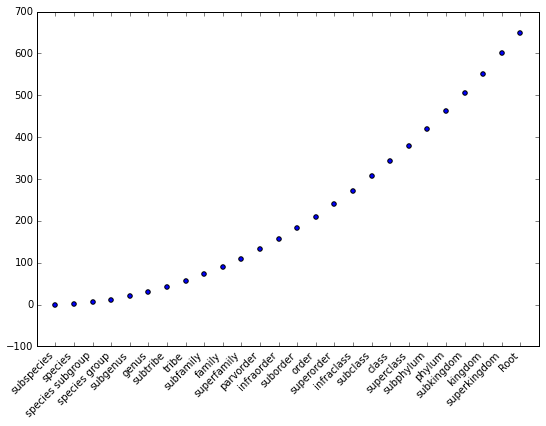

In [68]:
plt.figure(figsize=(9, 6))
plt.scatter(rank_idx, distance_vect(rank_idx))
locs, _ = plt.xticks()
# plt.yticks(np.arange(0, 1.2, 0.2), np.arange(0, 1.2, 0.2))
plt.xticks(rank_idx, ranks_in_order, rotation=45, ha='right')
plt.ylabel('', fontsize=18)
plt.xlim(-1, max(rank_idx) + 1)
plt.show()

In [65]:
distance = lambda l: np.arange(1. + l).sum()*2.
distance_vect = np.vectorize(distance)

index_of = lambda rank: ranks_in_order.index(rank) if rank in ranks_in_order else 0

def get_rank(u):
    return graph_rebase.node[u]['rank']

def dist_value(i, j):
    rank = lowest_shared_node(i, j)

    value = distance(index_of(rank))
    if get_rank(i) == rank or get_rank(j) == rank:
        value /= 2.
    return value


In [17]:
df = pd.DataFrame(graph_rebase.nodes(), columns=['TaxonID'])

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([ 483.4,  494. ,  504.6,  515.2,  525.8,  536.4,  547. ,  557.6,
         568.2,  578.8,  589.4]),
 <a list of 10 Patch objects>)

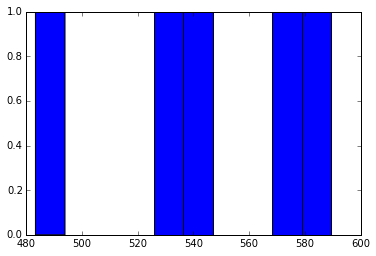

In [62]:
plt.hist([np.mean([dist_value(*df.TaxonID.sample(2).values) for _ in xrange(10**1)]) for __ in xrange(5)])

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([ 574.86,  576.26,  577.66,  579.06,  580.46,  581.86,  583.26,
         584.66,  586.06,  587.46,  588.86]),
 <a list of 10 Patch objects>)

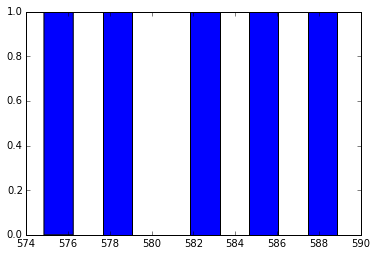

In [63]:
plt.hist([np.mean([dist_value(*df.TaxonID.sample(2).values) for _ in xrange(10**2)]) for __ in xrange(5)])

(array([ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([ 574.447 ,  575.1225,  575.798 ,  576.4735,  577.149 ,  577.8245,
         578.5   ,  579.1755,  579.851 ,  580.5265,  581.202 ]),
 <a list of 10 Patch objects>)

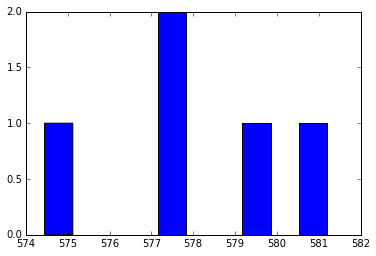

In [64]:
plt.hist([np.mean([dist_value(*df.TaxonID.sample(2).values) for _ in xrange(10**3)]) for __ in xrange(5)])

In [18]:
def _generate_samples(N):
    import numpy as np
    import networkx as nx
    import pandas as pd
    
    graph_rebase = nx.read_graphml('graph_rebase.graphml')
    
    ROOT = -1

    lineage = lambda n: nx.shortest_path(graph_rebase, str(ROOT), str(n))[::-1]

    def lowest_shared_node(u, v):
        u_lineage = lineage(u)
        v_lineage = lineage(v)
    #     if 9605 in set(u_lineage) | set(v_lineage):
    #         raise ValueError('No humans alowed!')
        for i in u_lineage:
            for j in v_lineage:
                if i == j:
                    return graph_rebase.node[i]['rank']
    ranks_in_order = [
    'Root',
    'superkingdom',
    'kingdom',
    'subkingdom',
    'phylum',
    'subphylum',
    'superclass',
    'class',
    'subclass',
    'infraclass',
    'superorder',
    'order',
    'suborder',
    'infraorder',
    'parvorder',
    'superfamily',
    'family',
    'subfamily',
    'tribe',
    'subtribe',
    'genus',
    'subgenus',
    'species group',
    'species subgroup',
    'species',
    'subspecies'][::-1]
    
    index_of = lambda rank: ranks_in_order.index(rank) if rank in ranks_in_order else 0
    dist_value = lambda rank: (1.*index_of(rank)/len(ranks_in_order))**3
    df = pd.DataFrame(graph_rebase.nodes(), columns=['TaxonID'])
    
    return np.mean([dist_value(lowest_shared_node(*df.TaxonID.sample(2).values)) for _ in xrange(10**N)])

In [19]:
x = np.arange(0, 5)

In [26]:
1 + x**2

array([ 1,  2,  5, 10, 17])

In [55]:
distance(3)

12.0